<a href="https://colab.research.google.com/github/gomathy14/Time-Series-Forecasting/blob/main/AR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('yahoo_stock.csv')

In [3]:
data2=data.copy()

In [4]:
data2.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [5]:
data2.shape

(1825, 7)

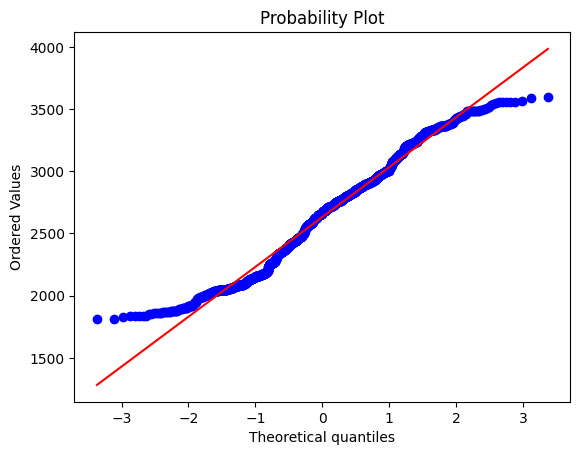

In [11]:
scipy.stats.probplot(data2['Low'],plot=pylab)
pylab.show()

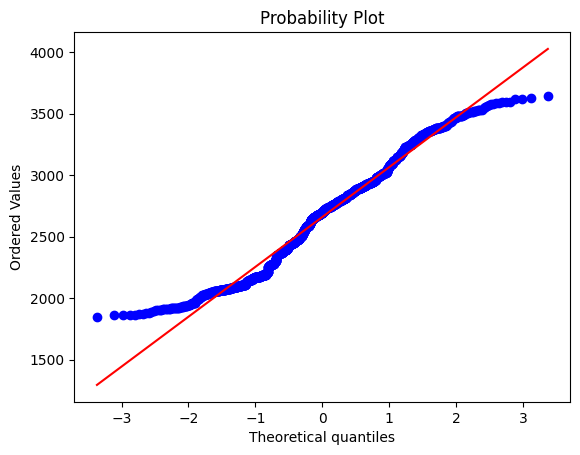

In [12]:
scipy.stats.probplot(data2['High'],plot=pylab)
pylab.show()

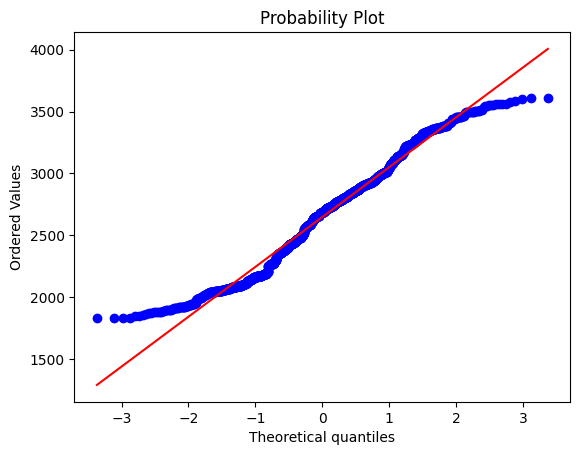

In [13]:
scipy.stats.probplot(data2['Open'],plot=pylab)
pylab.show()

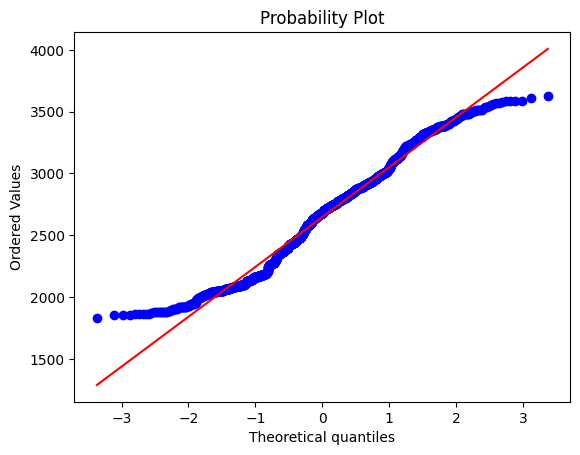

In [14]:
scipy.stats.probplot(data2['Close'],plot=pylab)
pylab.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [16]:
adf_test(data2["Open"])

Results of Dickey-Fuller Test:
Test Statistic                   -0.853865
p-value                           0.802786
#Lags Used                       14.000000
Number of Observations Used    1810.000000
Critical Value (1%)              -3.433968
Critical Value (5%)              -2.863138
Critical Value (10%)             -2.567621
dtype: float64


In [17]:
adf_test(data2["Close"])

Results of Dickey-Fuller Test:
Test Statistic                   -0.870397
p-value                           0.797565
#Lags Used                       23.000000
Number of Observations Used    1801.000000
Critical Value (1%)              -3.433986
Critical Value (5%)              -2.863146
Critical Value (10%)             -2.567625
dtype: float64


In [18]:
adf_test(data2["Low"])

Results of Dickey-Fuller Test:
Test Statistic                   -1.056909
p-value                           0.731947
#Lags Used                       13.000000
Number of Observations Used    1811.000000
Critical Value (1%)              -3.433966
Critical Value (5%)              -2.863137
Critical Value (10%)             -2.567620
dtype: float64


In [19]:
adf_test(data2["High"])

Results of Dickey-Fuller Test:
Test Statistic                   -0.713598
p-value                           0.843196
#Lags Used                       25.000000
Number of Observations Used    1799.000000
Critical Value (1%)              -3.433990
Critical Value (5%)              -2.863148
Critical Value (10%)             -2.567626
dtype: float64


In [20]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [21]:
kpss_test(data2["Open"])

Results of KPSS Test:
Test Statistic            5.858154
p-value                   0.010000
#Lags Used               27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-20-7cfb139457b1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [22]:
kpss_test(data2["Close"])

Results of KPSS Test:
Test Statistic            5.858579
p-value                   0.010000
#Lags Used               27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-20-7cfb139457b1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [23]:
kpss_test(data2["Low"])

Results of KPSS Test:
Test Statistic            5.788028
p-value                   0.010000
#Lags Used               27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-20-7cfb139457b1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [24]:
kpss_test(data2["Close"])

Results of KPSS Test:
Test Statistic            5.858579
p-value                   0.010000
#Lags Used               27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-20-7cfb139457b1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


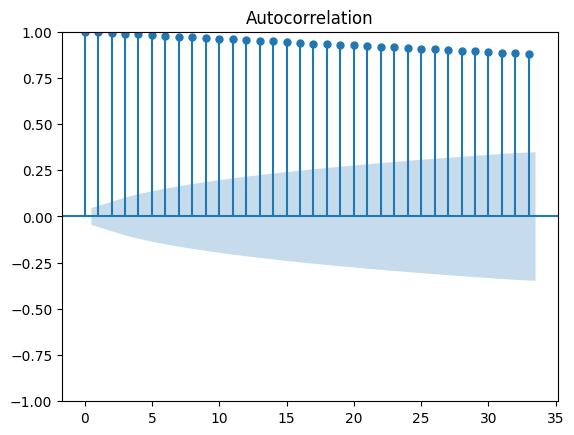

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2["Open"])
plt.show()

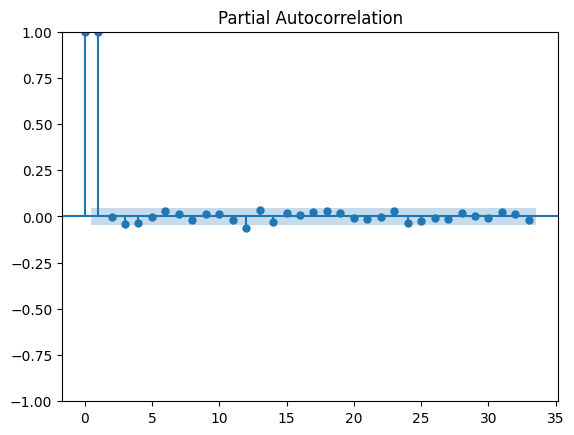

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data2["Open"])
plt.show()

In [32]:
train=data2[:1263]
test=data2[1263:]

In [34]:
train.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


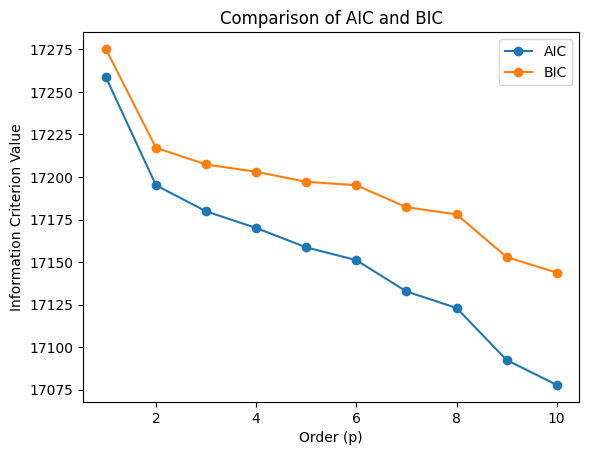

In [37]:
from statsmodels.tsa.ar_model import AutoReg

max_order = 10
aic_values = []
bic_values = []

for p in range(1, max_order + 1):
    model = AutoReg(data2['Close'], lags=p)
    result = model.fit()
    aic_values.append(result.aic)
    bic_values.append(result.bic)

# Plot AIC and BIC values
order = range(1, max_order + 1)
plt.plot(order, aic_values, marker='o', label='AIC')
plt.plot(order, bic_values, marker='o', label='BIC')
plt.xlabel('Order (p)')
plt.ylabel('Information Criterion Value')
plt.title('Comparison of AIC and BIC')
plt.legend()
plt.show()

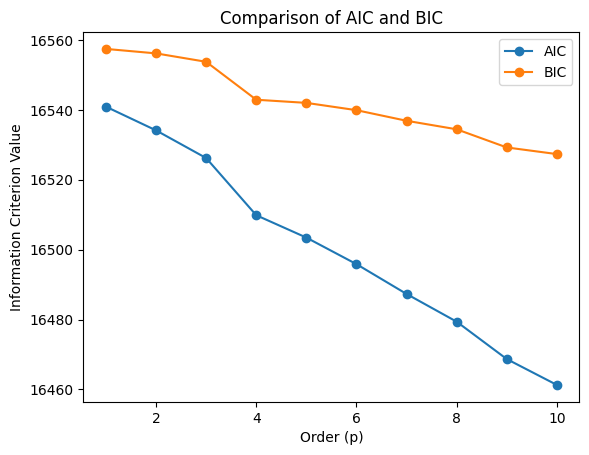

In [38]:
from statsmodels.tsa.ar_model import AutoReg

max_order = 10
aic_values = []
bic_values = []

for p in range(1, max_order + 1):
    model = AutoReg(data2['Open'], lags=p)
    result = model.fit()
    aic_values.append(result.aic)
    bic_values.append(result.bic)

# Plot AIC and BIC values
order = range(1, max_order + 1)
plt.plot(order, aic_values, marker='o', label='AIC')
plt.plot(order, bic_values, marker='o', label='BIC')
plt.xlabel('Order (p)')
plt.ylabel('Information Criterion Value')
plt.title('Comparison of AIC and BIC')
plt.legend()
plt.show()

In [39]:
model = AutoReg(data2['Close'], lags=1)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(1)   Log Likelihood               -8626.385
Method:               Conditional MLE   S.D. of innovations             27.397
Date:                Sat, 16 Dec 2023   AIC                          17258.770
Time:                        15:19:48   BIC                          17275.296
Sample:                             1   HQIC                         17264.866
                                 1825                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5653      4.224      1.081      0.280      -3.714      12.845
Close.L1       0.9986      0.002    633.156      0.000       0.995       1.002
                                    Roots           

In [40]:
model = AutoReg(data2['Close'], lags=2)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(2)   Log Likelihood               -8593.581
Method:               Conditional MLE   S.D. of innovations             26.978
Date:                Sat, 16 Dec 2023   AIC                          17195.161
Time:                        15:20:18   BIC                          17217.194
Sample:                             2   HQIC                         17203.289
                                 1825                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2151      4.166      0.772      0.440      -4.950      11.380
Close.L1       0.8233      0.023     35.699      0.000       0.778       0.868
Close.L2       0.1759      0.023      7.619      0.0

In [41]:
model = AutoReg(data2['Close'], lags=3)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(3)   Log Likelihood               -8584.905
Method:               Conditional MLE   S.D. of innovations             26.920
Date:                Sat, 16 Dec 2023   AIC                          17179.811
Time:                        15:20:40   BIC                          17207.349
Sample:                             3   HQIC                         17189.970
                                 1825                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6978      4.163      0.888      0.374      -4.461      11.856
Close.L1       0.8355      0.023     35.746      0.000       0.790       0.881
Close.L2       0.2334      0.030      7.778      0.0

In [42]:
model = AutoReg(data2['Close'], lags=4)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(4)   Log Likelihood               -8579.011
Method:               Conditional MLE   S.D. of innovations             26.902
Date:                Sat, 16 Dec 2023   AIC                          17170.022
Time:                        15:20:54   BIC                          17203.065
Sample:                             4   HQIC                         17182.212
                                 1825                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0229      4.166      0.966      0.334      -4.143      12.188
Close.L1       0.8326      0.023     35.556      0.000       0.787       0.878
Close.L2       0.2433      0.030      7.986      0.0

In [43]:
model = AutoReg(data2['Close'], lags=5)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1825
Model:                     AutoReg(5)   Log Likelihood               -8572.309
Method:               Conditional MLE   S.D. of innovations             26.873
Date:                Sat, 16 Dec 2023   AIC                          17158.618
Time:                        15:21:12   BIC                          17197.164
Sample:                             5   HQIC                         17172.839
                                 1825                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4293      4.168      1.063      0.288      -3.740      12.599
Close.L1       0.8303      0.023     35.468      0.000       0.784       0.876
Close.L2       0.2416      0.030      7.934      0.0